In [10]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [11]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [12]:
data_read_in = pd.read_csv("/content/gdrive/My Drive/ATMS523_Data/params.csv", index_col = 0) 
data_read_in = pd.concat([data_read_in[data_read_in['Label'] == 2], data_read_in[data_read_in['Label'] == 0]], axis = 0, ignore_index = True)

target = data_read_in['Label']

data_read_in = data_read_in.drop('Label', axis = 1)

In [13]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(data_read_in)

In [25]:
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(5, activation='relu'),
#Change or add more/fewer layers here
#    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu')
  ])
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [26]:
tf.keras.backend.clear_session()
BATCH_SIZE=500
model = get_basic_model()
history = model.fit(data_read_in, target, epochs=15,  validation_split=0.3, batch_size=BATCH_SIZE)

Epoch 1/15
348/348 [==============================] - 3s 6ms/step - loss: 2.9047 - accuracy: 0.5943 - val_loss: 0.0094 - val_accuracy: 0.8239
Epoch 2/15
348/348 [==============================] - 1s 3ms/step - loss: 2.0739 - accuracy: 0.7513 - val_loss: 0.0602 - val_accuracy: 0.8218
Epoch 3/15
348/348 [==============================] - 1s 2ms/step - loss: 1.4257 - accuracy: 0.7750 - val_loss: 0.0659 - val_accuracy: 0.8998
Epoch 4/15
348/348 [==============================] - 1s 3ms/step - loss: 1.3152 - accuracy: 0.8048 - val_loss: 0.0218 - val_accuracy: 0.9525
Epoch 5/15
348/348 [==============================] - 1s 3ms/step - loss: 1.2711 - accuracy: 0.8096 - val_loss: 0.0322 - val_accuracy: 0.9497
Epoch 6/15
348/348 [==============================] - 1s 3ms/step - loss: 1.2549 - accuracy: 0.8156 - val_loss: 0.0104 - val_accuracy: 0.9652
Epoch 7/15
348/348 [==============================] - 1s 3ms/step - loss: 1.2524 - accuracy: 0.8211 - val_loss: 0.0098 - val_accuracy: 0.9676
Epoch 

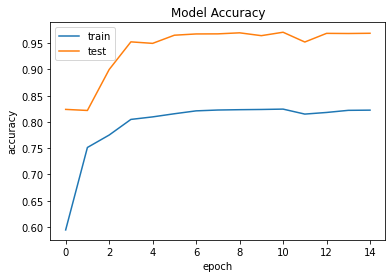

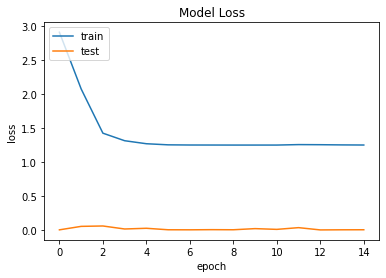

In [27]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#The lower the loss, the closer our predictions are to the true labels

79/79 [==============================] - 0s 2ms/step


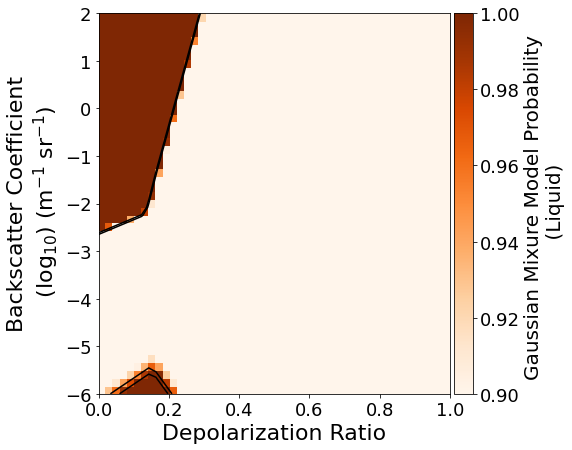

In [46]:
Np = 50

xx = np.linspace(-6, 2, Np)
yy = np.linspace(0, 1, Np)

Xp, Yp = np.meshgrid(xx, yy)
Pp = np.column_stack([Xp.ravel(), Yp.ravel()])

output = model.predict(Pp)
outgrid = np.reshape(output[:, 1],[50,50])
#outgrid[outgrid < 0.1] = np.nan
pd.DataFrame(outgrid).to_csv('/content/gdrive/My Drive/nn_liq_.csv')


fig = plt.figure(figsize=(7.5, 7))
fig.set_facecolor('w')

plt.contour(yy, xx, outgrid.T, colors = 'black', levels = [0.95, 0.99])

#outgrid[outgrid < 0.1] = np.nan
cm = plt.pcolormesh(yy, xx, outgrid.T, cmap='Oranges', vmin=[0.9,1])

cbar = plt.colorbar(cm, pad = 0.01)
cbar.ax.tick_params(labelsize = 18)
cbar.set_label('Gaussian Mixure Model Probability \n (Liquid)', fontsize = 20)

plt.tick_params(labelsize = 18)
plt.xlabel('Depolarization Ratio', fontsize = 22)
plt.ylabel('Backscatter Coefficient\n (log$_{10}$) (m$^{-1}$ sr$^{-1}$)', fontsize = 22)

plt.show()

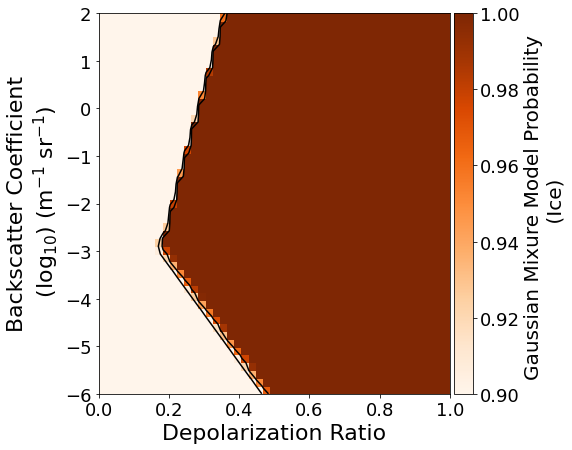

In [45]:
Np = 50

xx = np.linspace(-6, 2, Np)
yy = np.linspace(0, 1, Np)

Xp, Yp = np.meshgrid(xx, yy)
Pp = np.column_stack([Xp.ravel(), Yp.ravel()])

# output = model.predict(Pp)
# outgrid = np.reshape(output,[50,50])
# #outgrid[outgrid < 0.1] = np.nan
#pd.DataFrame(1 - outgrid.T).to_csv('/content/gdrive/My Drive/nn_ice_.csv')


fig = plt.figure(figsize=(7.5, 7))
fig.set_facecolor('w')

plt.contour(yy, xx, 1 - outgrid.T, colors = 'black', levels = [0.95, 0.99])

cm = plt.pcolormesh(yy, xx, 1-outgrid.T, cmap='Oranges', vmin=[0.9,1])

cbar = plt.colorbar(cm, pad = 0.01)
cbar.ax.tick_params(labelsize = 18)
cbar.set_label('Gaussian Mixure Model Probability \n (Ice)', fontsize = 20)

plt.tick_params(labelsize = 18)
plt.xlabel('Depolarization Ratio', fontsize = 22)
plt.ylabel('Backscatter Coefficient\n (log$_{10}$) (m$^{-1}$ sr$^{-1}$)', fontsize = 22)

plt.show()